# Module End Project
Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
employee = pd.read_csv('myexcel.csv')
employee.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [3]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [4]:
employee.Height = np.random.randint(150,180, employee.shape[0])
employee.Height

0      168
1      179
2      173
3      170
4      164
      ... 
453    158
454    160
455    161
456    162
457    153
Name: Height, Length: 458, dtype: int32

### 1.How many are there in each Team and the percentage splitting with respect to the total employees.

In [5]:
#Members in each Team
number = employee.Team.value_counts()
print('\nNumber of Employees in each Team\n\n', number)


Number of Employees in each Team

 New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: Team, dtype: int64


In [186]:
#Members percentage in each Team
percentage = (employee.Team.value_counts()/employee.Team.value_counts().sum())*100
percentage = np.round((percentage),2)
print('\nPercentage of Employees in each Team\n\n', percentage)


Percentage of Employees in each Team

 New Orleans Pelicans      4.15
Memphis Grizzlies         3.93
Utah Jazz                 3.49
New York Knicks           3.49
Milwaukee Bucks           3.49
Brooklyn Nets             3.28
Portland Trail Blazers    3.28
Oklahoma City Thunder     3.28
Denver Nuggets            3.28
Washington Wizards        3.28
Miami Heat                3.28
Charlotte Hornets         3.28
Atlanta Hawks             3.28
San Antonio Spurs         3.28
Houston Rockets           3.28
Boston Celtics            3.28
Indiana Pacers            3.28
Detroit Pistons           3.28
Cleveland Cavaliers       3.28
Chicago Bulls             3.28
Sacramento Kings          3.28
Phoenix Suns              3.28
Los Angeles Lakers        3.28
Los Angeles Clippers      3.28
Golden State Warriors     3.28
Toronto Raptors           3.28
Philadelphia 76ers        3.28
Dallas Mavericks          3.28
Orlando Magic             3.06
Minnesota Timberwolves    3.06
Name: Team, dtype: float64


### 2.Segregate the employees w.r.t different positions.

In [6]:
positions = employee.groupby('Position')
for Position, data in positions:
    print(f'Position : {Position}')
    print('\n')
    print(f'Data: {data}')

Position : C


Data:                 Name                    Team  Number Position  Age  Height  \
7       Kelly Olynyk          Boston Celtics      41        C   25     154   
10   Jared Sullinger          Boston Celtics       7        C   24     168   
14      Tyler Zeller          Boston Celtics      44        C   26     178   
23       Brook Lopez           Brooklyn Nets      11        C   28     162   
27        Henry Sims           Brooklyn Nets      14        C   26     177   
..               ...                     ...     ...      ...  ...     ...   
439    Mason Plumlee  Portland Trail Blazers      24        C   26     177   
447      Rudy Gobert               Utah Jazz      27        C   23     176   
455     Tibor Pleiss               Utah Jazz      21        C   26     161   
456      Jeff Withey               Utah Jazz      24        C   26     162   
457         Priyanka               Utah Jazz      34        C   25     153   

     Weight         College      Salary  


### 3.Find from which age group most of the employees belong to.

In [7]:
employee.Age.value_counts().sort_values(ascending = False).head(1)

24    47
Name: Age, dtype: int64

### 4.Find out under which team and position, spending in terms of salary is high.

In [8]:
#Checking for null values
employee.Salary.isnull().sum()

11

Checking whether grouping by Teams or by Position can be used for missing salaries

In [9]:
positions = employee.groupby('Position')
for Position, data in positions:
    print(f'Position : {Position}')
    print('\n')
    print(f'Data: {data}')

Position : C


Data:                 Name                    Team  Number Position  Age  Height  \
7       Kelly Olynyk          Boston Celtics      41        C   25     154   
10   Jared Sullinger          Boston Celtics       7        C   24     168   
14      Tyler Zeller          Boston Celtics      44        C   26     178   
23       Brook Lopez           Brooklyn Nets      11        C   28     162   
27        Henry Sims           Brooklyn Nets      14        C   26     177   
..               ...                     ...     ...      ...  ...     ...   
439    Mason Plumlee  Portland Trail Blazers      24        C   26     177   
447      Rudy Gobert               Utah Jazz      27        C   23     176   
455     Tibor Pleiss               Utah Jazz      21        C   26     161   
456      Jeff Withey               Utah Jazz      24        C   26     162   
457         Priyanka               Utah Jazz      34        C   25     153   

     Weight         College      Salary  


In [10]:
team = employee.groupby('Team')
for Team, data in team:
    print(f'Team : {Team}')
    print('\n')
    print(f'Data: {data}')

Team : Atlanta Hawks


Data:                  Name           Team  Number Position  Age  Height  Weight  \
309     Kent Bazemore  Atlanta Hawks      24       SF   26     173     201   
310  Tim Hardaway Jr.  Atlanta Hawks      10       SG   24     159     205   
311      Kirk Hinrich  Atlanta Hawks      12       SG   35     153     190   
312        Al Horford  Atlanta Hawks      15        C   30     153     245   
313    Kris Humphries  Atlanta Hawks      43       PF   31     178     235   
314       Kyle Korver  Atlanta Hawks      26       SG   35     157     212   
315      Paul Millsap  Atlanta Hawks       4       PF   31     163     246   
316      Mike Muscala  Atlanta Hawks      31       PF   24     160     240   
317   Lamar Patterson  Atlanta Hawks      13       SG   24     152     225   
318   Dennis Schroder  Atlanta Hawks      17       PG   22     174     172   
319        Mike Scott  Atlanta Hawks      32       PF   27     160     237   
320   Thabo Sefolosha  Atlanta Hawk

1. Salaries have big variations while grouping by both position and team
2. So here we are using grouping by team, Because there is more number of teams than positions
   and hence less number of values in each team.

In [11]:
employee.Salary = employee.groupby('Team')['Salary'].transform(lambda x: x.fillna(np.round(x.mean())))

In [12]:
employee.Salary.isnull().sum()

0

In [13]:
pos_salary = employee.groupby('Position').Salary.sum().sort_values(ascending = False)
pos_salary

Position
PG    469600090.0
C     466377332.0
PF    454835602.0
SF    414368335.0
SG    413094236.0
Name: Salary, dtype: float64

<Axes: title={'center': 'Salary distribution over Positions'}, xlabel='Position', ylabel='Salary(10^8)'>

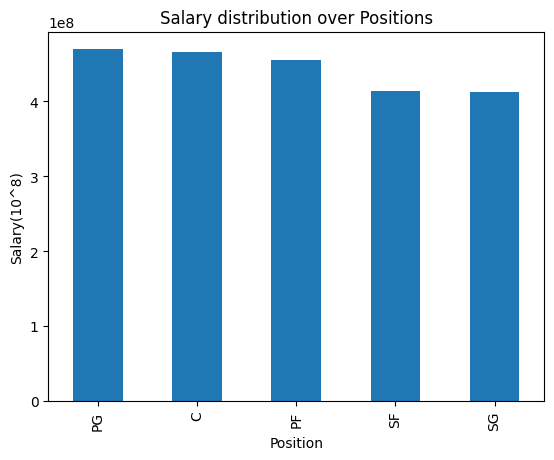

In [15]:
plt.title('Salary distribution over Positions')
plt.ylabel('Salary(10^8)')
pos_salary.plot(kind = 'bar')

In [14]:
team_salary = employee.groupby('Team').Salary.sum().sort_values(ascending = False)
team_salary

Team
Cleveland Cavaliers       114630738.0
Memphis Grizzlies          98422560.0
Miami Heat                 95210391.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Charlotte Hornets          78340920.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Denver Nuggets             64416354.0
Minnesota Timberwolves     64302751.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Boston Celtics             62722573.0
Orlando

<Axes: title={'center': 'Salary distribution over Teams'}, xlabel='Team', ylabel='Salary(10^8)'>

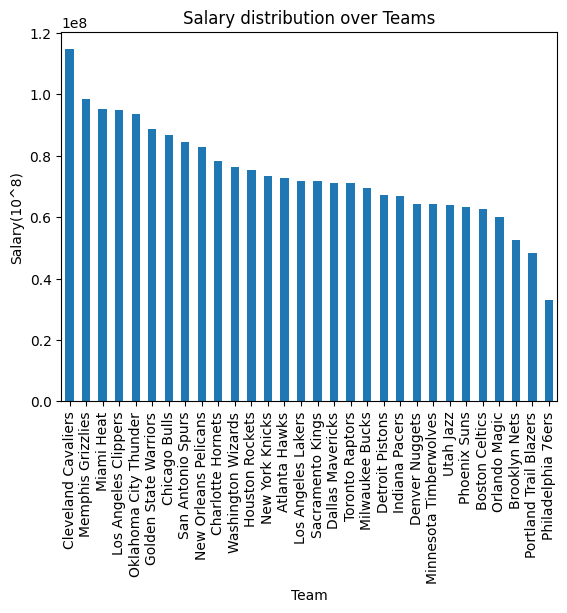

In [18]:
plt.title('Salary distribution over Teams')
plt.ylabel('Salary(10^8)')
team_salary.plot(kind = 'bar')

### 5.Find if there is any correlation between age and salary , represent it visually.

<Axes: >

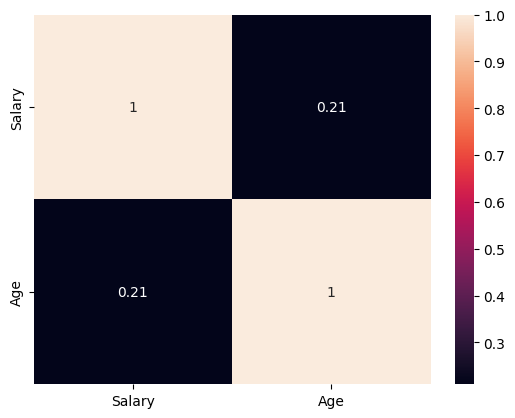

In [202]:
age_salary = employee[['Salary', 'Age']]
sns.heatmap(age_salary.corr(), annot = True)